In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib


C:\Users\Dell\AppData\Local\Temp\ipykernel_15672\3910135724.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('River.csv')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128978 entries, 0 to 128977
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   128978 non-null  int64  
 1   pH                      126457 non-null  float64
 2   Iron                    128126 non-null  float64
 3   Nitrate                 126728 non-null  float64
 4   5.29E-76                125148 non-null  float64
 5   Lead                    128414 non-null  float64
 6   Zinc                    125525 non-null  float64
 7   Color                   128844 non-null  object 
 8   Turbidity               127865 non-null  float64
 9   Fluoride                124916 non-null  float64
 10  Copper                  124753 non-null  float64
 11  Odor                    125268 non-null  float64
 12  Sulfate                 124799 non-null  float64
 13  Conductivity            125434 non-null  float64
 14  Chlorine            

Index        pH          Iron   Nitrate    5.29E-76           Lead  \
0      2  5.443762  2.010586e-02  3.816994  230.995630            NaN   
1      7  7.258203  6.110000e-09  9.261676  182.242341  4.400000e-224   
2      9  7.100650  3.019038e-03  3.620641  157.043934  6.460000e-148   
3     20  9.686076  2.048400e-04  9.588365  240.350234   6.900000e-23   
4     44  5.400853  7.340000e-14  5.739483  177.395747  1.950000e-100   

       Zinc         Color  Turbidity  Fluoride  ...  Chlorine     Manganese  \
0  0.528280  Light Yellow   0.319956  0.423423  ...  3.560224  7.007989e-02   
1  0.416478     Colorless   0.047803  1.016196  ...  2.325094  6.020000e-16   
2  0.112994     Colorless   0.050613  0.842107  ...  2.284971  8.840000e-07   
3  5.448293  Faint Yellow   0.040746  0.926771  ...  3.338544  6.576640e-04   
4  1.402138  Light Yellow   0.345791  0.116614  ...  2.770273  3.074910e-01   

   Total Dissolved Solids  Source  Water Temperature  Air Temperature  \
0              570.054094   River          11.643467        44.891330   
1              214.553104   River          15.891905        61.139140   
2              113.909077   River          11.899376        14.010268   
3              270.921435   River           7.824436        32.121731   
4              478.567391   River          29.371510        61.400910   

       Month   Day  Time of Day  Target  
0    January  31.0          8.0       0  
1      April  11.0          4.0       0  
2      April   7.0         12.0       0  
3     August  13.0          7.0       0  
4  September  10.0         15.0       0  

[5 rows x 24 columns]

In [3]:
df_filtered = df[['pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine', 'Total Dissolved Solids', 'Water Temperature', 'Target']]

df_filtered.isnull().sum()


pH                        2521
Nitrate                   2250
Color                      134
Turbidity                 1113
Odor                      3710
Chlorine                  1273
Total Dissolved Solids      38
Water Temperature         3621
Target                       0
dtype: int64

In [4]:
df_filtered = df_filtered.dropna()

In [5]:
categorical_cols = ['Color', 'Odor']

le = LabelEncoder()

for col in categorical_cols:
    df_filtered[col] = le.fit_transform(df_filtered[col])

for col in categorical_cols:
    print(f"\n{col} Encoding Mapping:")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(mapping)


Color Encoding Mapping:
{0.011084268: 0, 0.011133629: 1, 0.011161809: 2, 0.011177213: 3, 0.011292606: 4, 0.01132262: 5, 0.011325111: 6, 0.011353668: 7, 0.011395636: 8, 0.011457065: 9, 0.011483714: 10, 0.011497054: 11, 0.01151351: 12, 0.01163774: 13, 0.01170424: 14, 0.011790924: 15, 0.011828414: 16, 0.011861827: 17, 0.011886667: 18, 0.011939079: 19, 0.011943435: 20, 0.011962944: 21, 0.011974525: 22, 0.011977241: 23, 0.011992672: 24, 0.012001945: 25, 0.012034425: 26, 0.01203596: 27, 0.012064623: 28, 0.012082937: 29, 0.012100696: 30, 0.012140739: 31, 0.012165256: 32, 0.012180765: 33, 0.012186723: 34, 0.01220183: 35, 0.012244806: 36, 0.012324653: 37, 0.01242448: 38, 0.012438383: 39, 0.012510122: 40, 0.012575246: 41, 0.012582217: 42, 0.012606765: 43, 0.012616988: 44, 0.012632314: 45, 0.012675502: 46, 0.012733297: 47, 0.012736608: 48, 0.012741702: 49, 0.012746594: 50, 0.012796802: 51, 0.012838886: 52, 0.012846244: 53, 0.01285748: 54, 0.012871497: 55, 0.012906376: 56, 0.012933431: 57, 0.0129

EDA

In [6]:
df_filtered.describe()

pH        Nitrate          Color     Turbidity  \
count  114956.000000  114956.000000  114956.000000  1.149560e+05   
mean        7.451075       6.069912       1.665846  4.845289e-01   
std         0.843204       3.122644       1.394738  8.662873e-01   
min         2.544747       0.383020       0.000000  6.630000e-12   
25%         6.915628       3.944017       0.000000  3.696763e-02   
50%         7.452521       5.569708       2.000000  1.979876e-01   
75%         8.005663       7.571882       3.000000  5.927731e-01   
max        12.259117      56.220045       4.000000  1.658283e+01   

                Odor       Chlorine  Total Dissolved Solids  \
count  114956.000000  114956.000000           114956.000000   
mean    55943.786327       3.234546              264.201433   
std     32304.307899       0.718425              154.435258   
min         0.000000       1.035579                0.012152   
25%     27972.750000       2.731112              130.879144   
50%     55946.500000       3.196409              262.764238   
75%     83933.250000       3.684979              394.210395   
max    111841.000000       9.780436              579.797187   

       Water Temperature         Target  
count      114956.000000  114956.000000  
mean           19.150989       0.230236  
std            11.338070       0.420986  
min             1.274254       0.000000  
25%            11.366894       0.000000  
50%            16.496509       0.000000  
75%            23.881963       0.000000  
max           206.839869       1.000000

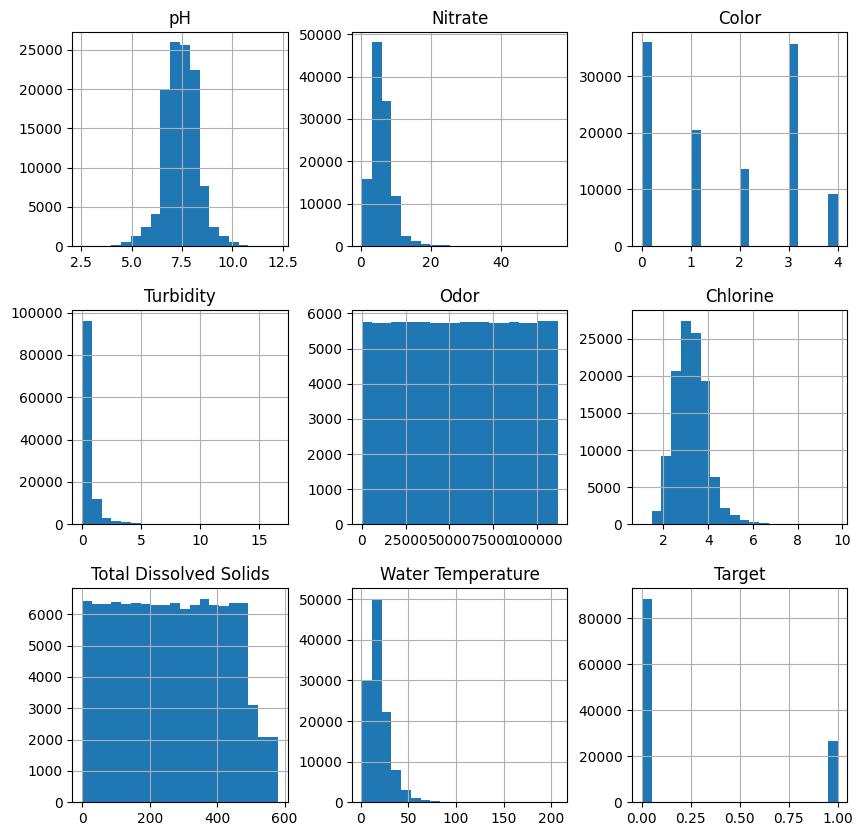

In [7]:
df_filtered.hist(figsize=(10, 10), bins=20)
plt.show()


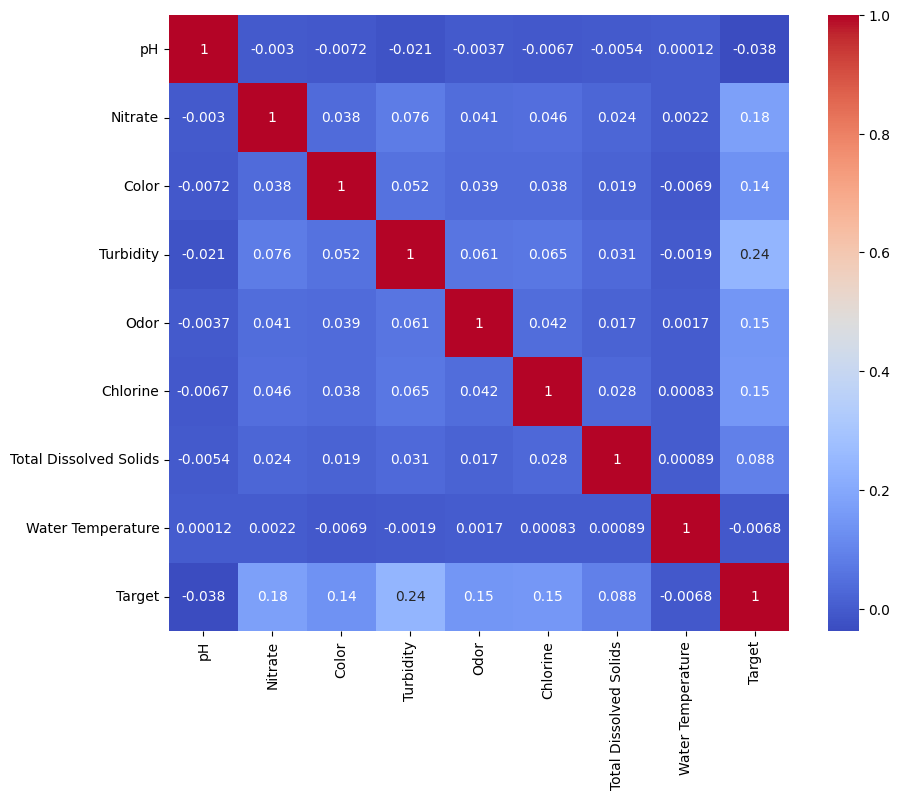

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['pH', 'Nitrate', 'Turbidity', 'Chlorine', 
                  'Total Dissolved Solids', 'Water Temperature']

df_filtered[numerical_cols] = scaler.fit_transform(df_filtered[numerical_cols])


In [10]:
X = df_filtered.drop('Target', axis=1)
y = df_filtered['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")


Training Set Size: (91964, 8)
Testing Set Size: (22992, 8)


Decision Tree Classifier

In [11]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 79.96%


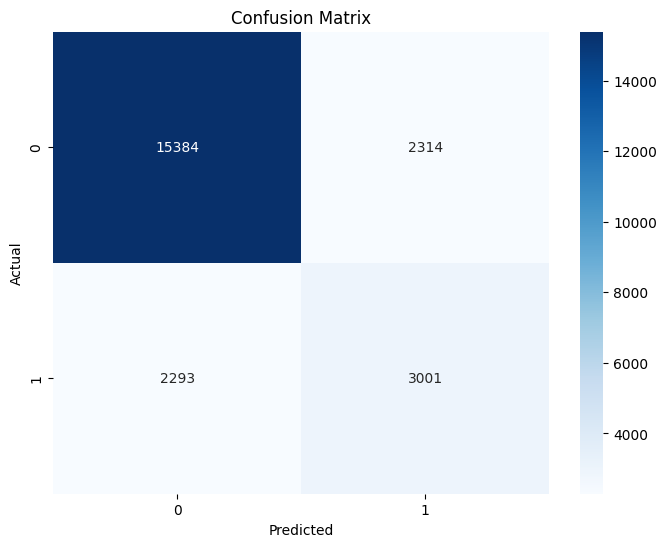


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     17698
           1       0.56      0.57      0.57      5294

    accuracy                           0.80     22992
   macro avg       0.72      0.72      0.72     22992
weighted avg       0.80      0.80      0.80     22992



In [12]:
y_pred = model.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


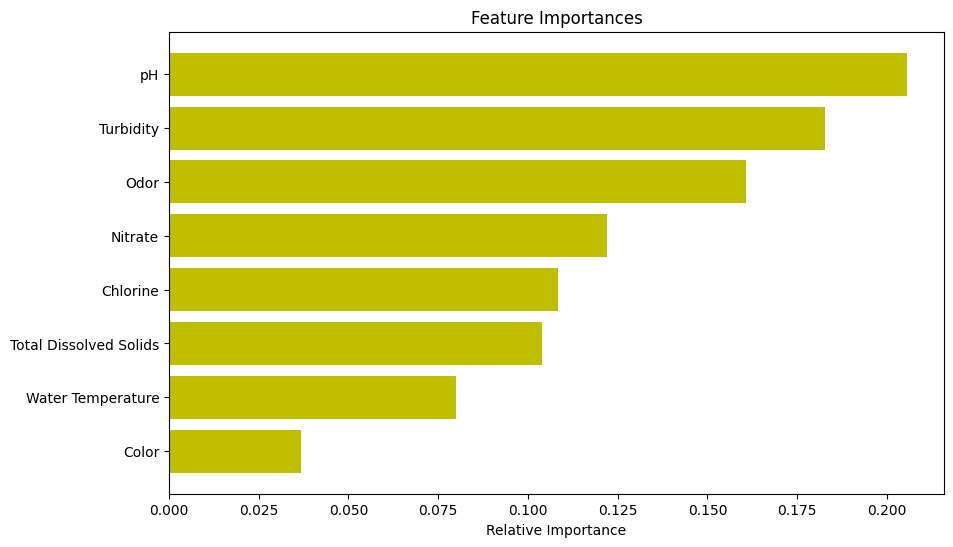

In [13]:
# Feature importance visualization
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

SVM